In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [2]:
#Reading the dataset from the specified file path into a DataFrame named Ecommerce_df.
Ecommerce_df=pd.read_csv('/Users/ranaarafat/Documents/Data Analyst course/Final project/Pakistan Largest Ecommerce Dataset.csv')
Ecommerce_df

/var/folders/0h/yl7pvkzn0ysc9hm550n9bvl40000gn/T/ipykernel_1350/1413869599.py:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  Ecommerce_df=pd.read_csv('/Users/ranaarafat/Documents/Data Analyst course/Final project/Pakistan Largest Ecommerce Dataset.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Data Exploration
#Displaying the first 10 rows of the dataset to get an initial understanding of its structure and contents.
Ecommerce_df.head(10)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
5,211137.0,canceled,7/1/2016,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,6.0,NaN,NaN,NaN,NaN,NaN
6,211138.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147449,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,7.0,NaN,NaN,NaN,NaN,NaN
7,211139.0,complete,7/1/2016,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,6.0,NaN,NaN,NaN,NaN,NaN
8,211140.0,canceled,7/1/2016,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147451,Mobiles & Tablets,\N,...,7.0,2016-7,7-2016,FY17,8.0,NaN,NaN,NaN,NaN,NaN
9,211141.0,canceled,7/1/2016,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147452,Mobiles & Tablets,\N,...,7.0,2016-7,7-2016,FY17,8.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#Displaying the last 10 rows of the dataset.
Ecommerce_df.tail(10)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking the dimensions of the dataset.
Ecommerce_df.shape

(1048575, 26)

In [6]:
# Displaying the column names of the dataset.
Ecommerce_df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [7]:
#Providing a concise summary of the dataset including column data types and non-null counts.
Ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [8]:
# Checking for null values
#Calculating the number of missing values in each column of the dataset.
Ecommerce_df.isna().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601229
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [9]:
# Dropping null columns(last 5)
Ecommerce_df = Ecommerce_df.iloc[:, :-5]
Ecommerce_df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [10]:
# Now dropping null rows
Ecommerce_df[Ecommerce_df['item_id'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Ecommerce_df.dropna(subset=['item_id'], inplace=True)

In [12]:
Ecommerce_df.isna().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137178
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [13]:
# Converting date columns to date-time format
Ecommerce_df['created_at'] = pd.to_datetime(Ecommerce_df['created_at'])
Ecommerce_df['Working Date'] = pd.to_datetime(Ecommerce_df['Working Date'])

In [14]:
Ecommerce_df.drop(columns=['increment_id', 'sales_commission_code', 'FY', 'M-Y', 'BI Status', ' MV '], inplace=True)

In [15]:
Ecommerce_df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016-07-01,2016.0,7.0,2016-7,4.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,2016-07-01,2016.0,7.0,2016-7,5.0


In [16]:
Ecommerce_df.isna().sum()

item_id              0
status              15
created_at           0
sku                 20
price                0
qty_ordered          0
grand_total          0
category_name_1    164
discount_amount      0
payment_method       0
Working Date         0
Year                 0
Month                0
Customer Since      11
Customer ID         11
dtype: int64

In [17]:
Ecommerce_df[Ecommerce_df['category_name_1'].isna()]


,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
425895,725194.0,order_refunded,2018-01-02,MEFQMO59B0942707B79-L,99.0,2.0,2.0,NaN,346.0,Easypay,2018-01-02,2018.0,1.0,2017-8,59587.0
431194,731122.0,received,2018-01-15,MEFQMO59B0942707B79-M,99.0,1.0,249.0,NaN,0.0,cod,2018-01-15,2018.0,1.0,2017-8,59587.0
432492,732569.0,canceled,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,NaN,0.0,bankalfalah,2018-01-19,2018.0,1.0,2017-3,37311.0
432494,732572.0,canceled,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,NaN,0.0,bankalfalah,2018-01-19,2018.0,1.0,2017-3,37311.0
432496,732575.0,order_refunded,2018-01-19,MEFQMO59B0942707B79-M,99.0,1.0,249.0,NaN,0.0,cod,2018-01-19,2018.0,1.0,2018-1,85633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535572,850761.0,received,2018-05-16,KABASA5ABC763F62E76,506.0,1.0,656.0,NaN,0.0,cod,2018-05-16,2018.0,5.0,2018-5,108622.0
541927,857600.0,received,2018-05-25,WOFASA5AE962A6DD038,199.0,1.0,1344.0,NaN,0.0,cod,2018-05-25,2018.0,5.0,2016-7,2237.0
549314,865823.0,canceled,2018-06-04,MEFQMO59B0942707B79-M,99.0,1.0,249.0,NaN,0.0,Easypay,2018-06-04,2018.0,6.0,2018-1,85385.0
568069,886699.0,canceled,2018-07-18,COMWD5AA8FF5851E73,314.0,1.0,464.0,NaN,0.0,easypay_voucher,2018-07-18,2018.0,7.0,2018-7,113144.0


In [18]:
Ecommerce_df['category_name_1'].fillna('Others', inplace=True)
# filling the missing values (NaN) in the 'category_name_1' column with the string 'Others'. 
# The fillna() method is used to replace missing values with the specified value, 'Others' in this case. 
# The inplace=True parameter ensures that the changes are made directly to the DataFrame Ecommerce_df without the need to assign the result back to the DataFrame.
Ecommerce_df['category_name_1'].replace('\\N','Others', inplace=True)
# These operations ensure that missing or undefined values in the 'category_name_1' column are replaced with the string 'Others',
# making the data more consistent and suitable for analysis and visualization.


In [19]:
Ecommerce_df[Ecommerce_df['status'].isna()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
477519,783751.0,NaN,2018-03-15,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,Others,0.0,cod,2018-03-15,2018.0,3.0,2018-3,95141.0
513736,827187.0,NaN,2018-04-16,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,Kids & Baby,0.0,cod,2018-04-16,2018.0,4.0,2018-4,105059.0
513737,827189.0,NaN,2018-04-16,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,Kids & Baby,0.0,cod,2018-04-16,2018.0,4.0,2018-4,105059.0
513738,827191.0,NaN,2018-04-16,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,Kids & Baby,0.0,cod,2018-04-16,2018.0,4.0,2018-4,105059.0
513739,827193.0,NaN,2018-04-16,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,Kids & Baby,0.0,cod,2018-04-16,2018.0,4.0,2018-4,105059.0
513740,827195.0,NaN,2018-04-16,KABCOL5AB2B8019805C-8-9 Years,423.0,1.0,2707.0,Kids & Baby,0.0,cod,2018-04-16,2018.0,4.0,2018-4,105059.0
518706,832777.0,NaN,2018-04-30,ENTCLI5A5DD7D800D6E,6042.0,1.0,6042.0,Entertainment,0.0,cod,2018-04-30,2018.0,4.0,2018-4,106036.0
532965,848003.0,NaN,2018-05-14,MATINF5AE310D2D7A1A,13950.0,1.0,13950.0,Mobiles & Tablets,0.0,cod,2018-05-14,2018.0,5.0,2018-4,105319.0
542146,857829.0,NaN,2018-05-25,ROO5AE983F2751EA,2280.0,1.0,2280.0,Superstore,0.0,cod,2018-05-25,2018.0,5.0,2018-5,109580.0
554962,872154.0,NaN,2018-06-15,BAGPHI5AA665985A58E,2900.0,1.0,949.0,Beauty & Grooming,200.0,bankalfalah,2018-06-15,2018.0,6.0,2018-5,109420.0


In [20]:
Ecommerce_df.dropna(subset=['status'], inplace=True)

In [21]:
Ecommerce_df.isna().sum()
Ecommerce_df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016-07-01,2016.0,7.0,2016-7,4.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,2016-07-01,2016.0,7.0,2016-7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,Women's Fashion,0.0,cod,2018-08-28,2018.0,8.0,2018-8,115320.0
584520,905205.0,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-8,115326.0
584521,905206.0,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0


In [22]:
Ecommerce_df.dropna(subset=['sku'], inplace=True)

In [23]:
Ecommerce_df.isna().sum()
Ecommerce_df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016-07-01,2016.0,7.0,2016-7,4.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,2016-07-01,2016.0,7.0,2016-7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,Women's Fashion,0.0,cod,2018-08-28,2018.0,8.0,2018-8,115320.0
584520,905205.0,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-8,115326.0
584521,905206.0,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0


In [24]:
Ecommerce_df.dropna(subset=['Customer Since'], inplace=True)

In [25]:
Ecommerce_df.isna().sum()
Ecommerce_df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016-07-01,2016.0,7.0,2016-7,4.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,2016-07-01,2016.0,7.0,2016-7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,Women's Fashion,0.0,cod,2018-08-28,2018.0,8.0,2018-8,115320.0
584520,905205.0,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-8,115326.0
584521,905206.0,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0


In [26]:
Ecommerce_df.isna().sum()

item_id            0
status             0
created_at         0
sku                0
price              0
qty_ordered        0
grand_total        0
category_name_1    0
discount_amount    0
payment_method     0
Working Date       0
Year               0
Month              0
Customer Since     0
Customer ID        0
dtype: int64

In [27]:
Ecommerce_df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016-07-01,2016.0,7.0,2016-7,4.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,2016-07-01,2016.0,7.0,2016-7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,Women's Fashion,0.0,cod,2018-08-28,2018.0,8.0,2018-8,115320.0
584520,905205.0,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-8,115326.0
584521,905206.0,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0


In [28]:
#Checking for any duplicate 
#Counting the number of duplicated rows in the dataset.
Ecommerce_df['item_id'].duplicated().sum()

0

In [29]:
Ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584478 entries, 0 to 584523
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584478 non-null  float64       
 1   status           584478 non-null  object        
 2   created_at       584478 non-null  datetime64[ns]
 3   sku              584478 non-null  object        
 4   price            584478 non-null  float64       
 5   qty_ordered      584478 non-null  float64       
 6   grand_total      584478 non-null  float64       
 7   category_name_1  584478 non-null  object        
 8   discount_amount  584478 non-null  float64       
 9   payment_method   584478 non-null  object        
 10  Working Date     584478 non-null  datetime64[ns]
 11  Year             584478 non-null  float64       
 12  Month            584478 non-null  float64       
 13  Customer Since   584478 non-null  object        
 14  Customer ID      584478 n

In [30]:
Ecommerce_df[['Year', 'Month', 'Customer ID','item_id']] = Ecommerce_df[['Year', 'Month', 'Customer ID','item_id']].astype(str)

In [31]:
Ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584478 entries, 0 to 584523
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584478 non-null  object        
 1   status           584478 non-null  object        
 2   created_at       584478 non-null  datetime64[ns]
 3   sku              584478 non-null  object        
 4   price            584478 non-null  float64       
 5   qty_ordered      584478 non-null  float64       
 6   grand_total      584478 non-null  float64       
 7   category_name_1  584478 non-null  object        
 8   discount_amount  584478 non-null  float64       
 9   payment_method   584478 non-null  object        
 10  Working Date     584478 non-null  datetime64[ns]
 11  Year             584478 non-null  object        
 12  Month            584478 non-null  object        
 13  Customer Since   584478 non-null  object        
 14  Customer ID      584478 n

In [32]:
Ecommerce_df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016-07-01,2016.0,7.0,2016-7,4.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,2016-07-01,2016.0,7.0,2016-7,5.0


In [33]:
Ecommerce_df.to_csv('Pak_Ecommerce.csv', index=False)

In [34]:
Ecommerce_df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016-07-01,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016-07-01,2016.0,7.0,2016-7,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016-07-01,2016.0,7.0,2016-7,4.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,cod,2016-07-01,2016.0,7.0,2016-7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,Women's Fashion,0.0,cod,2018-08-28,2018.0,8.0,2018-8,115320.0
584520,905205.0,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-8,115326.0
584521,905206.0,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018-08-28,2018.0,8.0,2018-7,113474.0


In [35]:
#Now the data is cleaned and ready for analysis and visualization, will proceed with exploring and analyzing it to gain insights.

In [36]:
#The analysis aimed to identify the best-selling category based on 
#sales revenue or transaction volume over the years 2016, 2017, and 2018 using Pakistan's Largest E-Commerce Dataset.
#After filtering the dataset and aggregating the data by category and year, visualizations were created to illustrate the sales trends of different categories over time

In [37]:
#Best selling category
Ecommerce_df['category_name_1'].value_counts()

category_name_1
Mobiles & Tablets     115709
Men's Fashion          92218
Women's Fashion        59720
Appliances             52413
Superstore             43611
Beauty & Grooming      41493
Others                 37205
Soghaat                34011
Home & Living          26504
Entertainment          26322
Health & Sports        17502
Kids & Baby            16489
Computing              15933
School & Education      3478
Books                   1870
Name: count, dtype: int64

In [38]:
 #Set the size and style of the current matplotlib figure.
    #Parameters:
        #width (float): Width of the figure in inches.
        #height (float): Height of the figure in inches.
        #style (str): Style of the figure (e.g., 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks').
def set_figure_style_size(width, height, style):
    plt.figure(figsize=(width, height))
    sns.set_style(style)

In [39]:
#Customize the title, xlabel, and ylabel of a plot.
    #Parameters:
       # plot: Plot object (e.g., matplotlib AxesSubplot or seaborn FacetGrid) to customize.
        #title (str): Title of the plot.
        #xlabel (str): Label for the x-axis.
        #ylabel (str): Label for the y-axis.
        #title_font (int): Font size for the title.
        #label_font (int): Font size for the x and y-axis labels.
def customize_plot_labels(plot, title:str, xlabel:str, ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize=title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize=label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize=label_font, weight='bold')

/var/folders/0h/yl7pvkzn0ysc9hm550n9bvl40000gn/T/ipykernel_1350/1099648086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=Ecommerce_df, x='category_name_1', palette='husl')


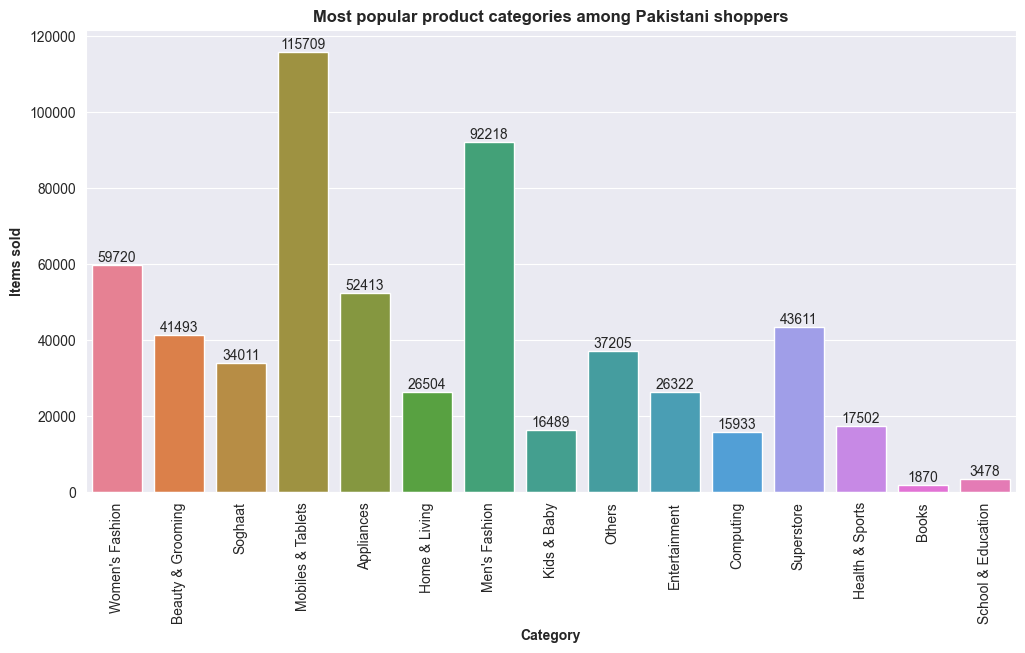

In [40]:
set_figure_style_size(12, 6, 'darkgrid')

ax = sns.countplot(data=Ecommerce_df, x='category_name_1', palette='husl')

customize_plot_labels(ax, 'Most popular product categories among Pakistani shoppers', 'Category', 'Items sold', 12, 10)
for container in ax.containers:
    ax.bar_label(container)
ax.tick_params('x', rotation=90)

In [ ]:
# Mobile and tablet categories are the most popular among Pakistani shoppers, based on the analysis of item sales data.


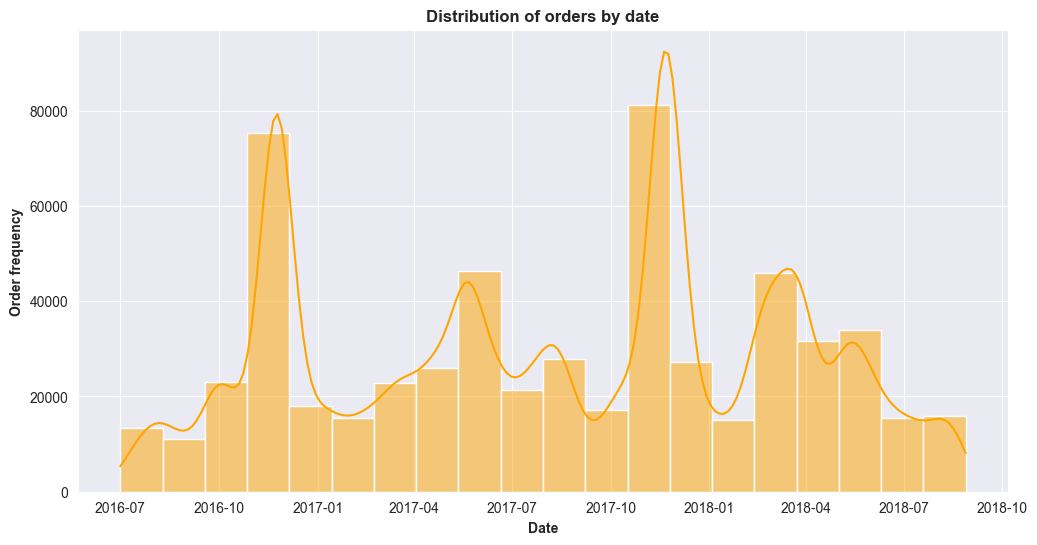

In [41]:
#sales trends of previous years and identify months with high sales.
set_figure_style_size(12,6,'darkgrid')
ax = sns.histplot(data=Ecommerce_df, x='created_at', bins=20, color='orange', kde=True)
customize_plot_labels(ax, 'Distribution of orders by date', 'Date', 'Order frequency', 12,10)

In [ ]:
#The period from October 2017 to January 2018 experienced the highest frequency of orders, as indicated by the distribution of orders by date.


In [42]:
total_sales_per_day = Ecommerce_df.groupby('created_at')[['grand_total']].sum().reset_index()
total_sales_per_day['year'] = total_sales_per_day['created_at'].dt.year
total_sales_per_day['month'] = total_sales_per_day['created_at'].dt.month

In [43]:
SalesIn16 = total_sales_per_day[total_sales_per_day['year'] == 2016]
SalesIn16

,created_at,grand_total,year,month
0,2016-07-01,1301026.75,2016,7
1,2016-07-02,1408450.48,2016,7
2,2016-07-03,2215490.88,2016,7
3,2016-07-04,1094080.25,2016,7
4,2016-07-05,913053.50,2016,7
...,...,...,...,...
179,2016-12-27,2273819.81,2016,12
180,2016-12-28,2462747.22,2016,12
181,2016-12-29,3089912.76,2016,12
182,2016-12-30,3976302.09,2016,12


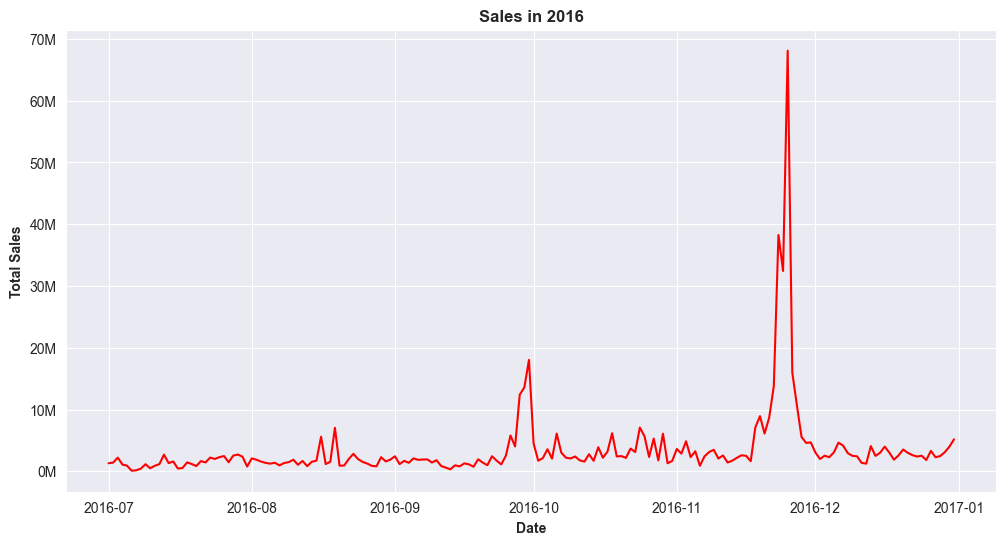

In [44]:
#sales trends in 2016.
set_figure_style_size(12,6,'darkgrid')
ax = sns.lineplot(data=SalesIn16, x='created_at',y='grand_total',  color='red', markers=True)
ax.set_yticks(range(0,70000000+1,10000000))
ax.set_yticklabels(['0M', '10M', '20M', '30M', '40M', '50M', '60M', '70M'])
customize_plot_labels(ax, 'Sales in 2016', 'Date', 'Total Sales', 12,10)

In [ ]:
#The sales trend plot for 2016 shows fluctuations in total sales over time, with the period from November 2016 to December 2016 registering the highest total sales.



In [45]:
SalesIn17 = total_sales_per_day[total_sales_per_day['year'] == 2017]
SalesIn17

,created_at,grand_total,year,month
184,2017-01-01,3137663.00,2017,1
185,2017-01-02,5807952.60,2017,1
186,2017-01-03,8228821.70,2017,1
187,2017-01-04,8481439.85,2017,1
188,2017-01-05,5612300.46,2017,1
...,...,...,...,...
544,2017-12-27,2463512.30,2017,12
545,2017-12-28,1723766.16,2017,12
546,2017-12-29,3041901.45,2017,12
547,2017-12-30,2188996.21,2017,12


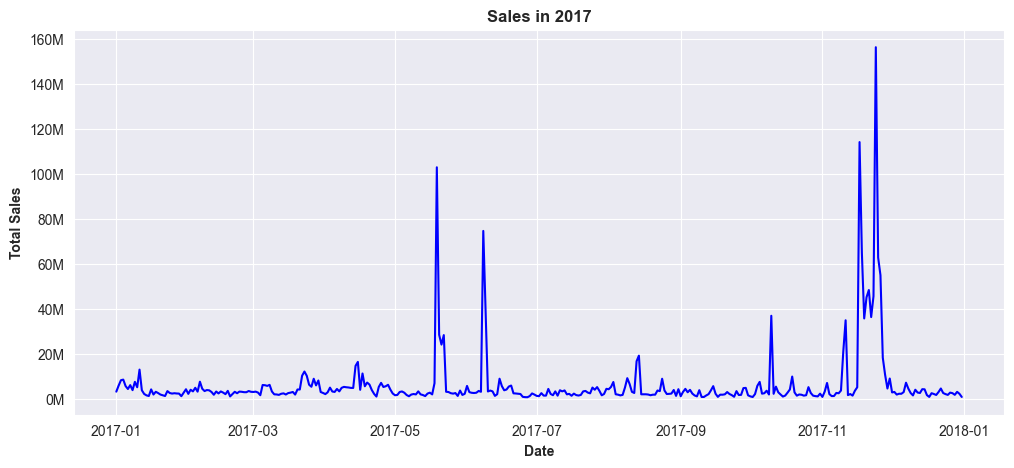

In [46]:
#sales trends in 2017.
set_figure_style_size(12,5,'darkgrid')
ax = sns.lineplot(data=SalesIn17, x='created_at',y='grand_total',  color='blue', markers=True)
ax.set_yticks(range(0,160000000+1,20000000))
ax.set_yticklabels(['0M', '20M', '40M', '60M', '80M', '100M', '120M', '140M', '160M'])
customize_plot_labels(ax, 'Sales in 2017', 'Date', 'Total Sales', 12,10)

In [ ]:
# The sales trend plot for 2017 shows fluctuations in total sales over time, with the period from December 2017 to janury 2017 registering the highest total sales.



In [47]:
SalesIn18 = total_sales_per_day[total_sales_per_day['year'] == 2018]
SalesIn18

,created_at,grand_total,year,month
549,2018-01-01,10147742.31,2018,1
550,2018-01-02,4255191.05,2018,1
551,2018-01-03,4368196.41,2018,1
552,2018-01-04,2087253.40,2018,1
553,2018-01-05,6609678.02,2018,1
...,...,...,...,...
784,2018-08-24,2078130.30,2018,8
785,2018-08-25,3669771.90,2018,8
786,2018-08-26,3707955.40,2018,8
787,2018-08-27,2425669.03,2018,8


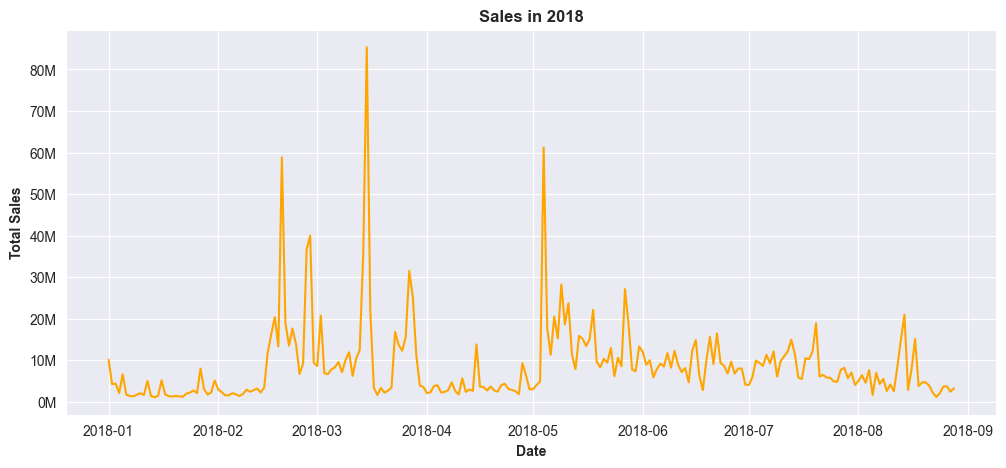

In [81]:
#sales trends in 2018.
set_figure_style_size(12,5,'darkgrid')
ax = sns.lineplot(data=SalesIn18, x='created_at',y='grand_total',  color='orange', markers=True)
ax.set_yticks(range(0,80000000+1,10000000))
ax.set_yticklabels(['0M', '10M', '20M', '30M', '40M', '50M', '60M', '70M', '80M'])
customize_plot_labels(ax, 'Sales in 2018', 'Date', 'Total Sales', 12,10)

In [ ]:
# The sales trend plot for 2018 shows fluctuations in total sales over time, with the period from march 2018 to April 2018 registering the highest total sales.


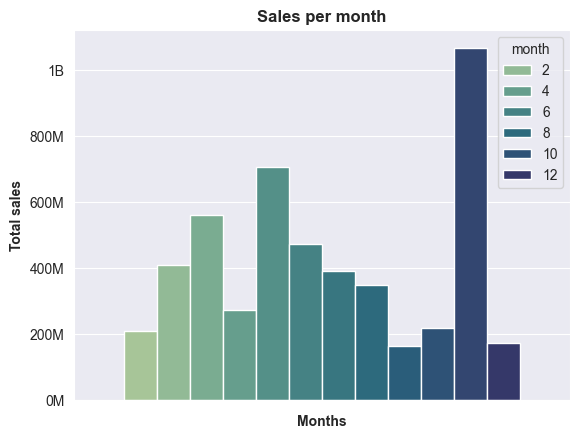

In [49]:
#Now by month
per_month = total_sales_per_day.groupby('month')[['grand_total']].sum().reset_index()
ax = sns.barplot(data=per_month, hue='month', y='grand_total', palette='crest')
ax.set_yticks(range(0,1000000000+1,200000000))
ax.set_yticklabels(['0M', '200M', '400M', '600M', '800M', '1B'])
customize_plot_labels(ax, 'Sales per month', 'Months', 'Total sales',12,10)

In [ ]:
#The bar plot the total sales for each month, with October showing the highest total sales compared to other months.

In [50]:
#Payment Method and Order Status Frequency Visualization.
#Counting the frequency of each payment method and order status.
#Comparing the frequency of payment methods and order statuses

In [51]:
# Count Frequency of Payment Methods
#groups similar payment methods into broader categories. For example, 
#payment methods like "Payaxis", "internetbanking", "mcblite", "ublcreditcard", and "bankalfalah" are 
#all grouped under the category "Banks/Cards/Wallets". This consolidation simplifies the analysis by reducing the number of 
#distinct payment methods
Ecommerce_df['payment_method'].replace(['Payaxis', 'internetbanking','mcblite', 'ublcreditcard', 
                                              'bankalfalah'], 'Banks/Cards/Wallets', inplace=True)

Ecommerce_df['payment_method'].replace(['easypay_voucher', 'Easypay', 'Easypay_MA'], 'Easypaisa', inplace=True)
Ecommerce_df['payment_method'].replace(['jazzwallet', 'jazzvoucher'], 'JazzCash', inplace=True)

Ecommerce_df['payment_method'].replace(['cashatdoorstep', 'cod'], 'Cash on Delivery', inplace=True)

Ecommerce_df['payment_method'].replace(['customercredit', 'apg', 'mygateway', 'productcredit',
                                              'marketingexpense', 'financesettlement'], 'Others', inplace=True)


In [52]:
# Count Frequency of Payment Methods
payment_method_freq = Ecommerce_df['payment_method'].value_counts()
payment_method_freq

payment_method
Cash on Delivery       272653
Easypaisa              128099
Banks/Cards/Wallets    122781
JazzCash                50778
Others                  10167
Name: count, dtype: int64

In [53]:
payment_method_freq_df = payment_method_freq.reset_index().rename(columns={'index': 'payment_method', 0: 'count'})
payment_method_freq_df

,payment_method,count
0,Cash on Delivery,272653
1,Easypaisa,128099
2,Banks/Cards/Wallets,122781
3,JazzCash,50778
4,Others,10167


/var/folders/0h/yl7pvkzn0ysc9hm550n9bvl40000gn/T/ipykernel_1350/1562575010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_method_freq_df, x='payment_method', y='count', palette='Set2')


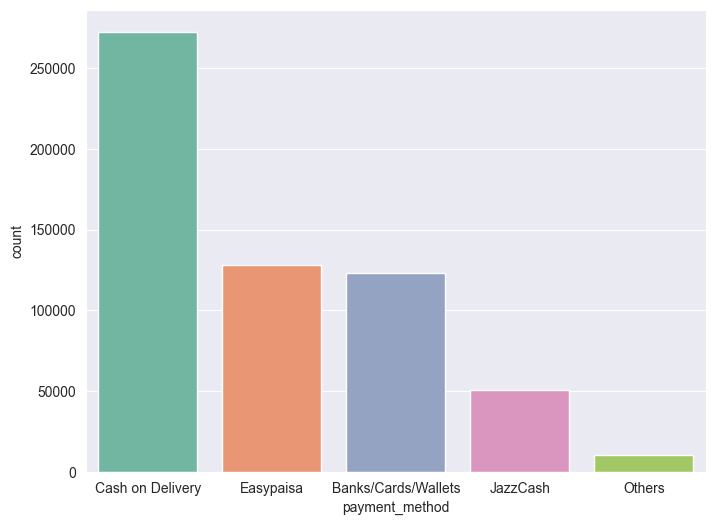

In [54]:
# Set the size and style of the plot
set_figure_style_size(8, 6, 'darkgrid')
sns.barplot(data=payment_method_freq_df, x='payment_method', y='count', palette='Set2')
customize_plot_labels(ax, 'Frequency of Payment Methods', 'Payment Method', 'Frequency', 14, 12)

In [55]:
#"cod" (Cash on Delivery) has the highest frequency, it indicates that a significant portion of customers prefers to pay in cash upon delivery.

In [56]:
Ecommerce_df['status'].replace(['received', 'cod', 'paid'],'complete', inplace=True)

Ecommerce_df['status'].replace('order_refunded', 'refund', inplace=True)

Ecommerce_df['status'].replace('closed', 'canceled', inplace=True)

Ecommerce_df['status'].replace(['payment_review', 'pending', 'processing', 'holded', 'fraud',
                                      'pending_paypal', 'exchange', '\\N'], 'others', inplace=True)

In [57]:
# Count Frequency of Order Statuses
order_status_freq = Ecommerce_df['status'].value_counts()
order_status_freq

status
complete    314991
canceled    201729
refund       67564
others         194
Name: count, dtype: int64

In [58]:
order_status_freq_df = order_status_freq.reset_index().rename(columns={'index': 'status', 0: 'count'})
order_status_freq_df

,status,count
0,complete,314991
1,canceled,201729
2,refund,67564
3,others,194


/var/folders/0h/yl7pvkzn0ysc9hm550n9bvl40000gn/T/ipykernel_1350/832905017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_status_freq_df, x='status', y='count', palette='Set2')


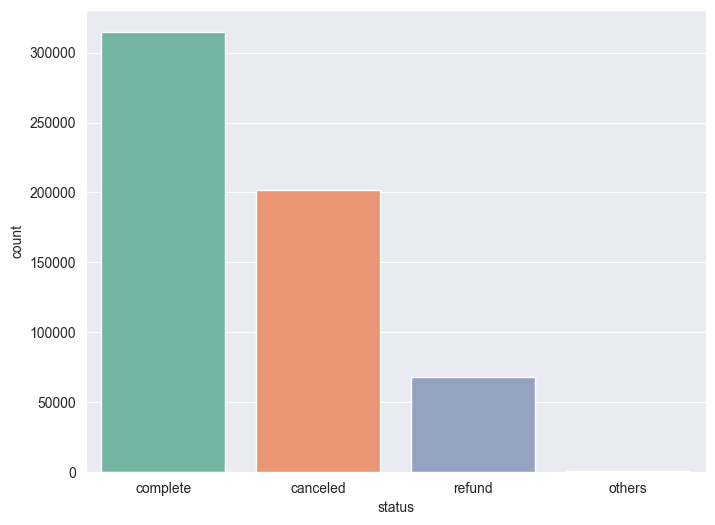

In [59]:
# Create a countplot for order statuses
# Set the size and style of the plot
set_figure_style_size(8, 6, 'darkgrid')
sns.barplot(data=order_status_freq_df, x='status', y='count', palette='Set2')
customize_plot_labels(ax, 'Frequency of Order Statuses', 'status', 'Frequency', 14, 12)


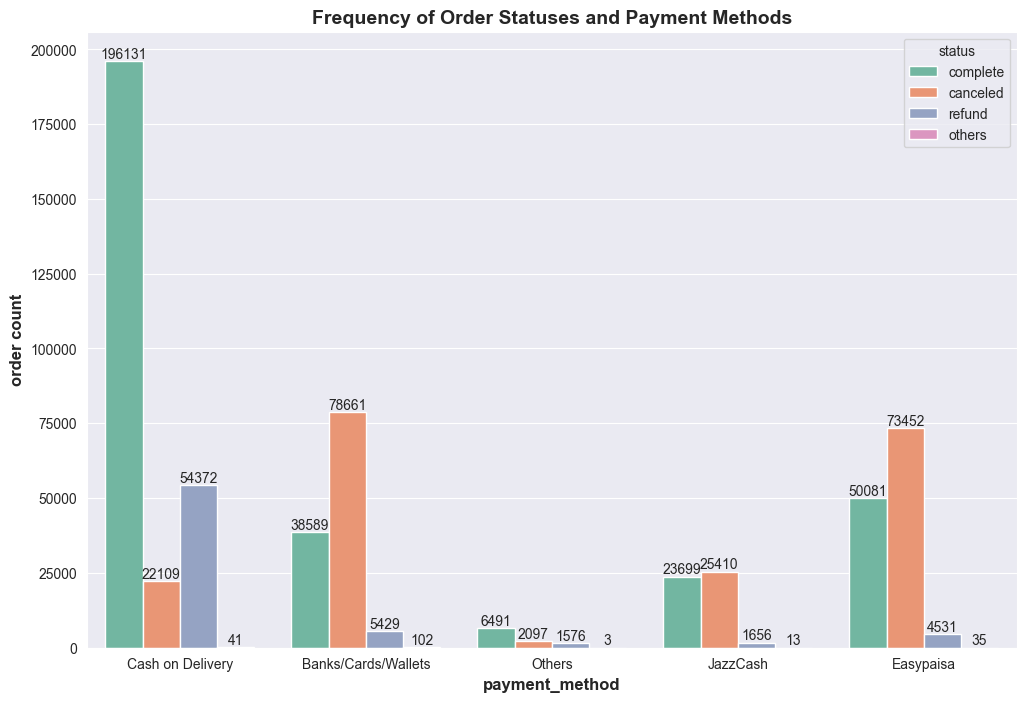

In [60]:
# Set the size and style of the plot
set_figure_style_size(12, 8, 'darkgrid')

# Create a combined bar plot
ax = sns.countplot(data=Ecommerce_df, x='payment_method',  hue='status', palette='Set2')

# Customize plot labels
customize_plot_labels(ax, 'Frequency of Order Statuses and Payment Methods', 'payment_method', 'order count', 14, 12)
for container in ax.containers:
    ax.bar_label(container)


In [61]:
# Many online payments are being canceled, indicating potential issues with the payment process or customer dissatisfaction.
# Easypaisa and various banks/cards/wallets exhibit notably high cancellation rates, suggesting possible challenges or inefficiencies associated with these payment methods.
# Cash on Delivery (COD) orders demonstrate a significantly higher success rate, with the majority of them being marked as completed.

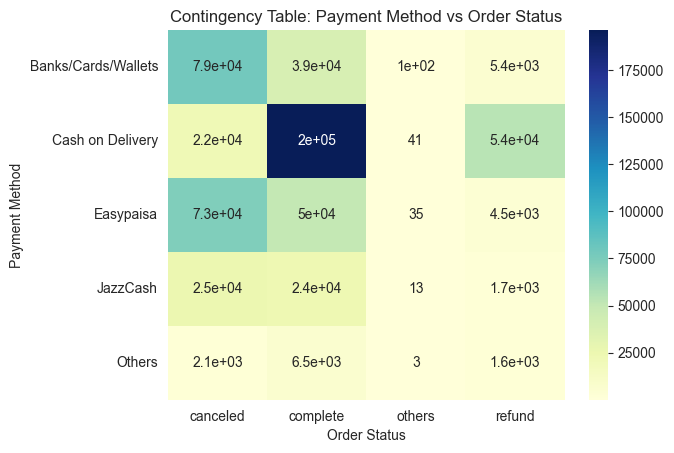

Chi-square value: 175845.1488932235
P-value: 0.0
There is a significant association between payment method and order status.


In [62]:
# Create contingency table
contingency_table = pd.crosstab(Ecommerce_df['payment_method'], Ecommerce_df['status'])

# Visualize contingency table using heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Contingency Table: Payment Method vs Order Status')
plt.xlabel('Order Status')
plt.ylabel('Payment Method')
plt.show()

# Calculate correlation coefficient (Chi-square test)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square value:", chi2)
print("P-value:", p)

# Determine significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between payment method and order status.")
else:
    print("There is no significant association between payment method and order status.")


# create a contingency table using pd.crosstab() to count the frequencies of different combinations of payment method and order status.
# visualize the contingency table using a heatmap to visually assess the relationship between payment method and order status.
# calculate the chi-square statistic and p-value using chi2_contingency() to determine if there's a significant association between payment method and order status.
#Finally, interpret the results and assess the significance based on the calculated p-value and chosen significance level (alpha).

In [63]:
#When the p-value from a chi-square test is below a certain significance level (typically 0.05), it suggests that there is a significant association between the categorical variables being tested. In this case, the p-value is reported as 0.0, which is smaller than the common significance level of 0.05.

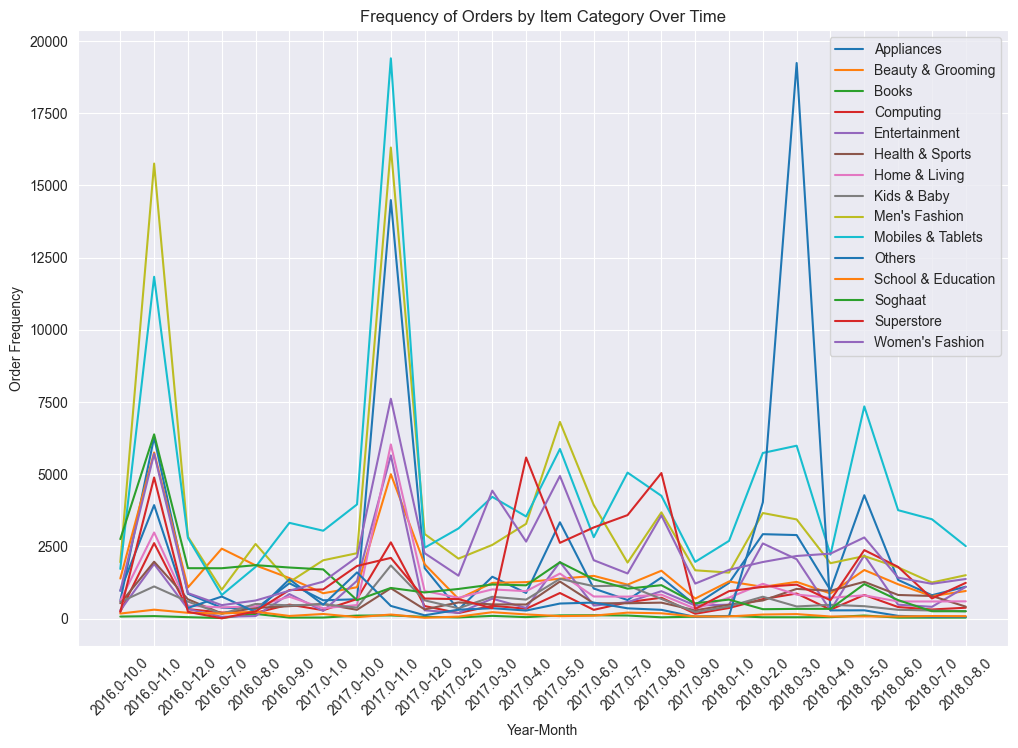

In [64]:
#This code generates a line plot to visualize the frequency of orders for each item category over time.
# Group orders by date (year-month) and item category
order_date_category = Ecommerce_df.groupby(['Year', 'Month', 'category_name_1']).size().reset_index(name='order_count')

# Combine 'Year' and 'Month' columns to create a 'Year-Month' column
order_date_category['Year-Month'] = order_date_category['Year'].astype(str) + '-' + order_date_category['Month'].astype(str)

# Line plot to visualize frequency of orders for each item category over time
plt.figure(figsize=(12, 8))
for category in order_date_category['category_name_1'].unique():
    category_data = order_date_category[order_date_category['category_name_1'] == category]
    plt.plot(category_data['Year-Month'], category_data['order_count'], label=category)

plt.title('Frequency of Orders by Item Category Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()


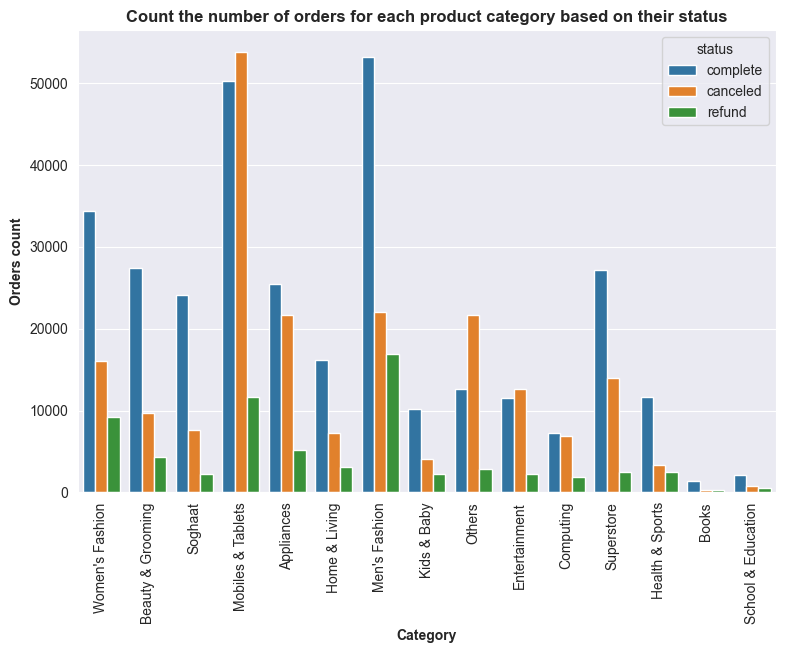

In [65]:
set_figure_style_size(9,6,'darkgrid')
ax = sns.countplot(data=Ecommerce_df[Ecommerce_df['status'] != 'others'], x='category_name_1', hue='status')
ax.tick_params('x', rotation=90)

customize_plot_labels(ax, 'Count the number of orders for each product category based on their status', 'Category', 'Orders count',12,10)

In [66]:
Ecommerce_df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,Year,Month,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,Cash on Delivery,2016-07-01,2016.0,7.0,2016-7,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,Cash on Delivery,2016-07-01,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,Cash on Delivery,2016-07-01,2016.0,7.0,2016-7,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,Cash on Delivery,2016-07-01,2016.0,7.0,2016-7,4.0
4,211136.0,refund,2016-07-01,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,Cash on Delivery,2016-07-01,2016.0,7.0,2016-7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,complete,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,Women's Fashion,0.0,Cash on Delivery,2018-08-28,2018.0,8.0,2018-8,115320.0
584520,905205.0,others,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,Banks/Cards/Wallets,2018-08-28,2018.0,8.0,2018-8,115326.0
584521,905206.0,others,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,Banks/Cards/Wallets,2018-08-28,2018.0,8.0,2018-7,113474.0
584522,905207.0,others,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,Banks/Cards/Wallets,2018-08-28,2018.0,8.0,2018-7,113474.0


In [67]:
Best_Prod = Ecommerce_df['sku'].value_counts().nlargest(20).to_frame()
Best_Prod

,count
sku,
MATSAM59DB75ADB2F80,3775
Al Muhafiz Sohan Halwa Almond,2258
emart_00-7,2027
kcc_krone deal,1894
infinix_Zero 4-Grey,1793
emart_00-1,1391
MATSAM59DB757FB47A2,1273
Rubian_U8 Smart Watch,1233
unilever_Deal-6,1213


/var/folders/0h/yl7pvkzn0ysc9hm550n9bvl40000gn/T/ipykernel_1350/2062759717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Best_Prod, x='count', y=Best_Prod.index,palette='viridis')


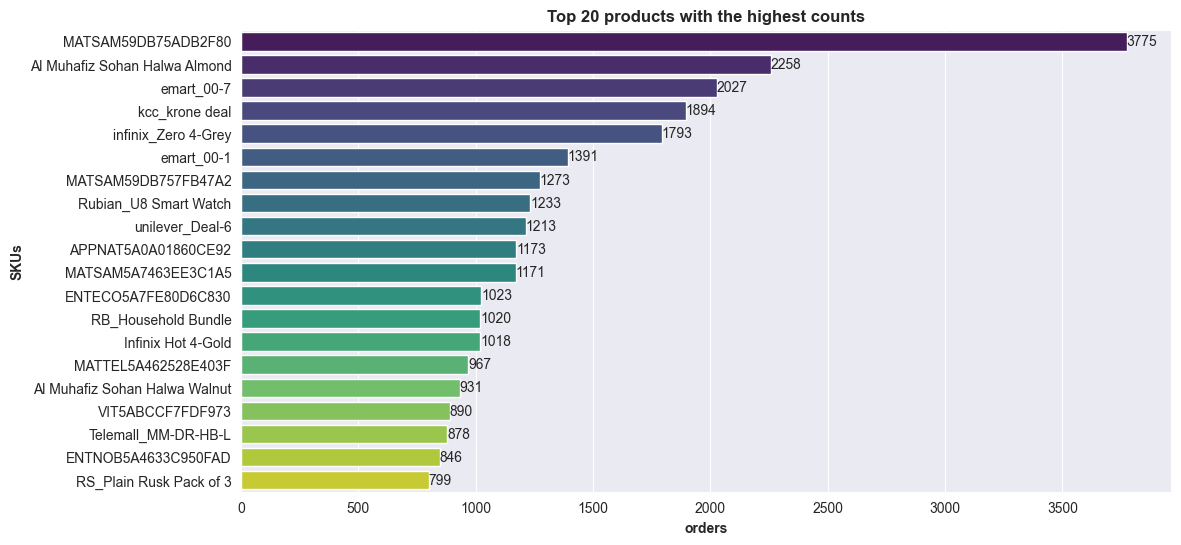

In [68]:
# Get the top 20 products with the highest count
# Create a bar plot
set_figure_style_size(12, 6, 'darkgrid')
ax = sns.barplot(data=Best_Prod, x='count', y=Best_Prod.index,palette='viridis')
customize_plot_labels(ax, 'Top 20 products with the highest counts', 'orders', 'SKUs', 12, 10)
for container in ax.containers:
    ax.bar_label(container)

/var/folders/0h/yl7pvkzn0ysc9hm550n9bvl40000gn/T/ipykernel_1350/3571835533.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_successful_products, x='count', y=top_successful_products.index,palette='viridis')


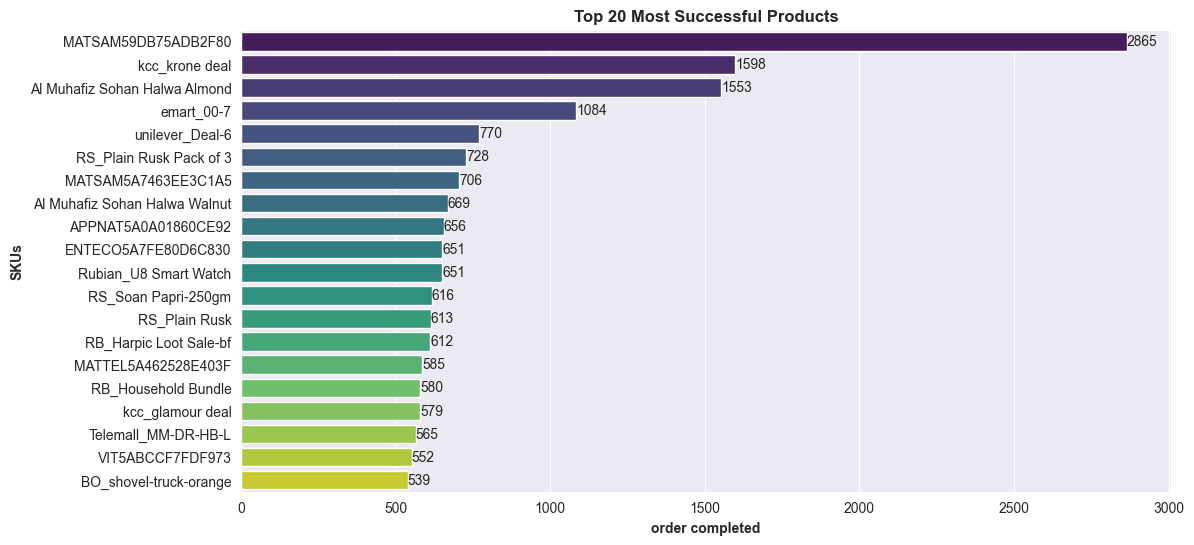

In [69]:
# Filter the DataFrame for completed orders
completed_orders = Ecommerce_df[Ecommerce_df['status'] == 'complete']

# Get the top 20 most successful products (SKUs) based on completion status
top_successful_products = completed_orders['sku'].value_counts().nlargest(20).to_frame()

set_figure_style_size(12, 6, 'darkgrid')
ax = sns.barplot(data=top_successful_products, x='count', y=top_successful_products.index,palette='viridis')
customize_plot_labels(ax, 'Top 20 Most Successful Products', 'order completed', 'SKUs', 12, 10)
for container in ax.containers:
    ax.bar_label(container)

In [70]:
# counting the occurrences of each SKU (product) and selects the top 20 SKUs with the highest counts,
#indicating the most successful products based on completion status. Finally, 
#it creates a bar plot to visualize the frequency of these successful products.


#Identifying "MATSAM59DB75ADB2F80" as the most completed product indicates that this specific SKU has the highest number of successful 
#transactions compared to other products in the dataset. it also expalain the highest count of order for this product.
# 1. Popular Product: "MATSAM59DB75ADB2F80" appears to be a highly sought-after item among customers, leading to a large number of successful transactions. This suggests that the product is well-received and meets the needs or preferences of the target market.
# 2. High Demand: The high completion rate for "MATSAM59DB75ADB2F80" may reflect strong demand from customers. Understanding the factors driving this demand, such as product features, pricing, or marketing efforts, can help inform inventory management and product promotion strategies.

/var/folders/0h/yl7pvkzn0ysc9hm550n9bvl40000gn/T/ipykernel_1350/3696386950.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_canceled_products, x='count', y=top_canceled_products.index,palette='viridis')


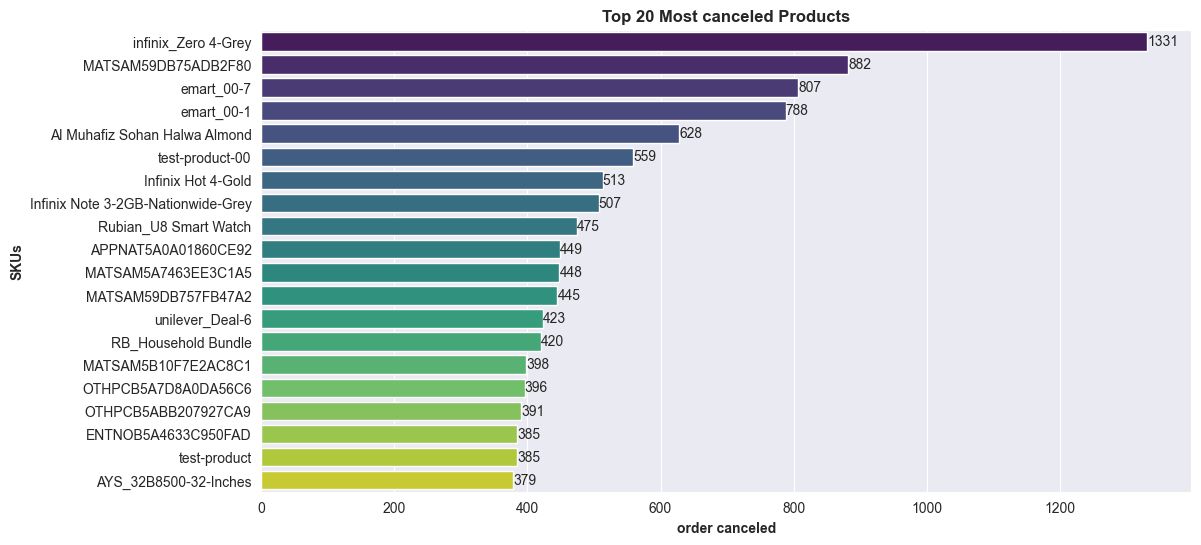

In [71]:
# Filter the DataFrame for cancled orders
canceled_orders = Ecommerce_df[Ecommerce_df['status'] == 'canceled']

# Get the top 20 most canceled products (SKUs) based on cancele status
top_canceled_products = canceled_orders['sku'].value_counts().nlargest(20).to_frame()

set_figure_style_size(12, 6, 'darkgrid')
ax = sns.barplot(data=top_canceled_products, x='count', y=top_canceled_products.index,palette='viridis')
customize_plot_labels(ax, 'Top 20 Most canceled Products', 'order canceled', 'SKUs', 12, 10)
for container in ax.containers:
    ax.bar_label(container)

In [72]:
#identifies and visualizes the top 20 most canceled products (SKUs) based on the count of canceled orders.
#Identifying "Infinix Zero 4-Grey" as the most canceled order indicates that this specific product has a high number of cancellations compared to other products in the dataset. Here are several interpretations and potential actions based on this finding:

#1. Product Demand and Availability: The high cancellation rate for "Infinix Zero 4-Grey" could suggest that there is a discrepancy between customer demand and product availability. Customers may be placing orders for this product expecting it to be in stock, only to later cancel when they find out it's unavailable.
#2. Product Description or Representation: There might be issues with how "Infinix Zero 4-Grey" is described or represented on the e-commerce platform. If the product information, images, or specifications are inaccurate or misleading, customers may cancel their orders upon realizing the discrepancy.
#3. Price Sensitivity: The cancellation rate could also be influenced by the pricing of "Infinix Zero 4-Grey". If customers perceive the product to be overpriced or if they find a better deal elsewhere after placing their orders, they may choose to cancel.
#4. Customer Preferences or Satisfaction: The high cancellation rate may indicate dissatisfaction or changing preferences among customers regarding "Infinix Zero 4-Grey". This could be due to various factors such as product quality, features, performance, or customer service experiences.
#5. Supply Chain Issues: Problems in the supply chain, such as delays in product delivery or fulfillment, could contribute to the high cancellation rate for "Infinix Zero 4-Grey". Customers may cancel their orders if they experience long wait times or uncertainty regarding the delivery schedule.
#6. Business Strategy Considerations: Understanding the reasons behind the cancellations for "Infinix Zero 4-Grey" can inform business strategies and decisions. For instance, it may prompt the business to review inventory management practices, improve product descriptions, adjust pricing strategies, or enhance customer support processes.


/var/folders/0h/yl7pvkzn0ysc9hm550n9bvl40000gn/T/ipykernel_1350/2506599805.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_redund_products, x='count', y=top_redund_products.index,palette='viridis')


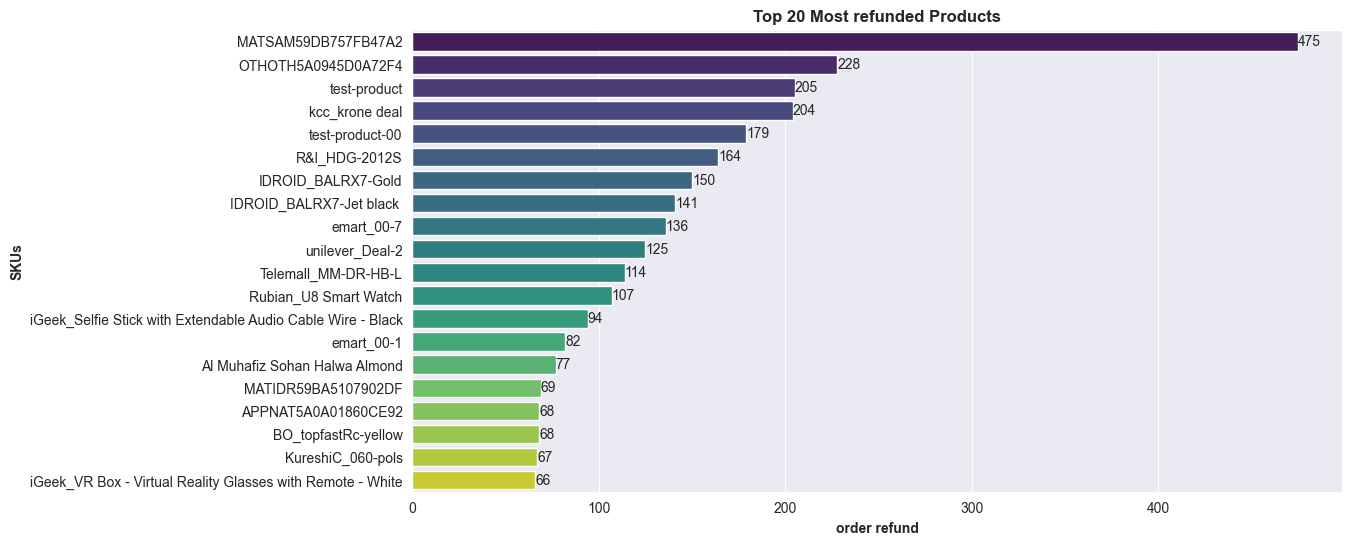

In [73]:
# Filter the DataFrame for refunded orders
refund_orders = Ecommerce_df[Ecommerce_df['status'] == 'refund']

# Get the top 20 most canceled products (SKUs) based on refund status
top_redund_products = refund_orders['sku'].value_counts().nlargest(20).to_frame()

set_figure_style_size(12, 6, 'darkgrid')
ax = sns.barplot(data=top_redund_products, x='count', y=top_redund_products.index,palette='viridis')
customize_plot_labels(ax, 'Top 20 Most refunded Products', 'order refund', 'SKUs', 12, 10)
for container in ax.containers:
    ax.bar_label(container)

In [74]:
# identifies and visualizes the top 20 most refunded products (SKUs) based on the count of orders refunded. 
# The bar plot provides a clear representation of the products that are most commonly refunded, allowing for further analysis 
# and decision-making regarding inventory management, product quality, or customer satisfaction initiatives.

#Identifying "MATSAM59DB757FB47A2" as the most refunded product (SKU) suggests that this particular item has experienced a high number of refund transactions compared to other products in the dataset.
#Product Quality Concerns: The high refund rate for "MATSAM59DB757FB47A2" may indicate potential issues with the product's quality, 
#functionality, or performance. Further investigation into customer feedback, product reviews, or return reasons could help identify specific concerns or defects that need to be addressed.




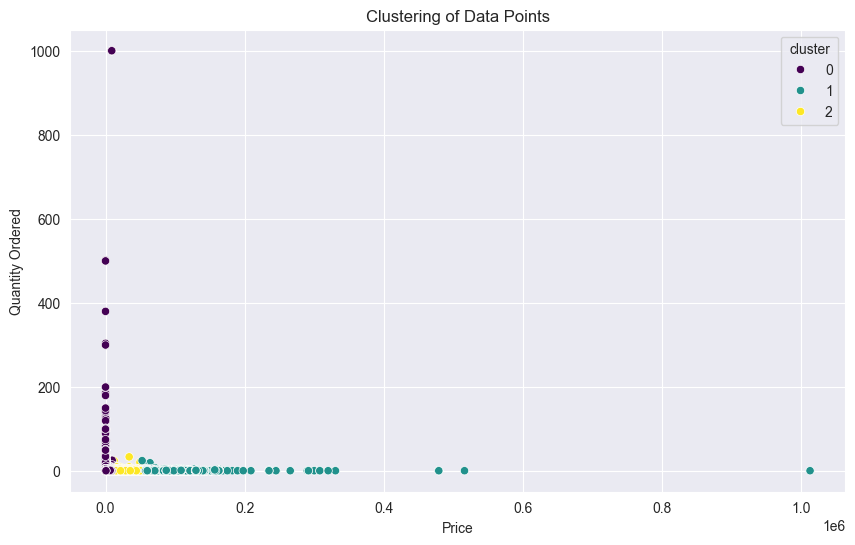

In [75]:
# Visualize unexpected patterns using clustering
# Assume you have features 'price' and 'qty_ordered' in your dataset
features = ['price', 'qty_ordered']
X = Ecommerce_df[features]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
Ecommerce_df['cluster'] = kmeans.fit_predict(X)

#Clustering Plot:
#This plot is generated using K-means clustering, a machine learning algorithm used for partitioning data into groups (clusters) based on similarities in features.
#Each data point represents an observation in the dataset, and its position on the plot is determined by the values of two selected features ('price' and 'qty_ordered' ).
#The plot is colored according to the cluster assignment made by the K-means algorithm. Data points with similar characteristics are grouped together into the same cluster, and different clusters are visually separated.
#The purpose of this plot is to identify patterns or groupings in the data that may not be immediately apparent by visual inspection. It helps in understanding the underlying structure of the dataset and discovering potential relationships between features.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='qty_ordered', hue='cluster', data=Ecommerce_df, palette='viridis')
plt.title('Clustering of Data Points')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.show()





In [76]:
# This clustering plot based on price and quantity ordered offers valuable insights into product segmentation,
# pricing strategies, and demand patterns, helping businesses make informed decisions regarding product positioning, 
# marketing, and inventory management.

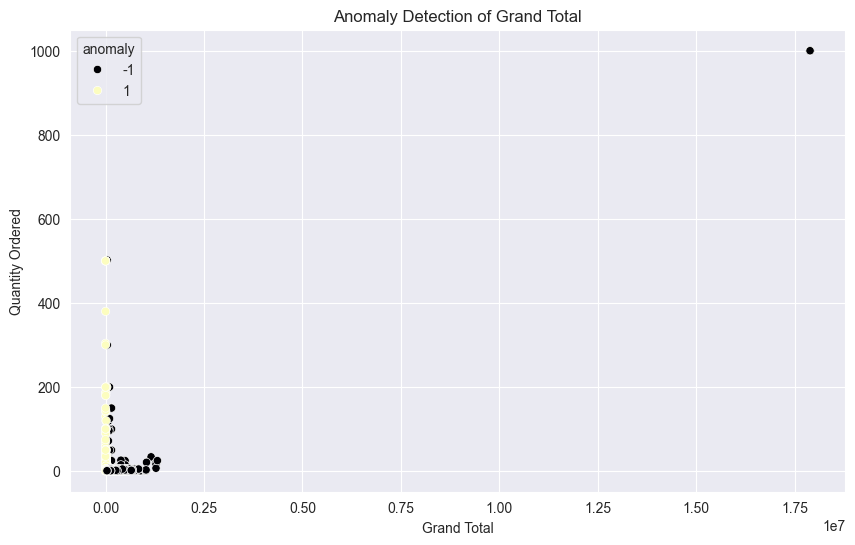

In [77]:
# Identify anomalies using Isolation Forest
# Assume you want to detect outliers in a single feature 'grand_total'
#Isolation Forest Algorithm: Isolation Forest is an unsupervised learning algorithm that identifies anomalies
#(outliers) in the dataset by isolating them into individual trees. It does this by recursively partitioning the data into subsets, 
#with anomalies requiring fewer partitions to isolate than normal data points.

isolation_forest = IsolationForest(contamination=0.05)
#Contamination Parameter: The contamination parameter (set to 0.05 in this case) specifies the expected proportion of 
#anomalies in the dataset. It determines the threshold for identifying outliers.
#In this case, 5% of the data points are expected to be anomalies.
Ecommerce_df['anomaly'] = isolation_forest.fit_predict(Ecommerce_df[['grand_total']])

#Fit and Predict: The Isolation Forest model is fitted to the 'grand_total' feature of the dataset using the fit_predict() method. 
#It assigns a binary label to each data point: 1 for normal points and -1 for anomalies.

# Plot anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grand_total', y='qty_ordered', hue='anomaly', data=Ecommerce_df, palette='magma')
plt.title('Anomaly Detection of Grand Total')
plt.xlabel('Grand Total')
plt.ylabel('Quantity Ordered')
plt.show()

In [78]:
#the presence of numerous anomalies identified by Isolation Forest provides valuable insights into data quality, 
#fraud detection, rare event identification, outlier detection, anomaly visualization, and risk assessment, 
#enabling businesses to make informed decisions, detect potential issues, and uncover hidden opportunities for improvement.

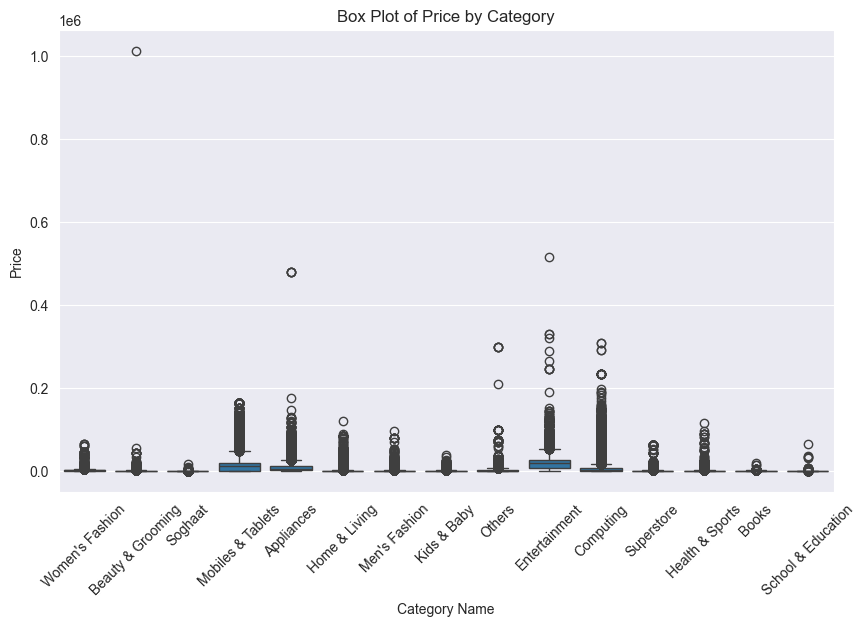

In [79]:
#Visualize unexpected patterns using other techniques (e.g., box plots, histograms)
#Box Plot of Price by Category: A box plot is used to visualize the distribution of prices for 
#different product categories. Box plots provide a concise summary of the distribution of a continuous variable (price) within each category. 
#They display the median, quartiles, and potential outliers, allowing for comparisons between categories and identification of any unusual patterns or variations in price distribution.
plt.figure(figsize=(10, 6))
sns.boxplot(x='category_name_1', y='price', data=Ecommerce_df)
plt.title('Box Plot of Price by Category')
plt.xlabel('Category Name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Iterate and explore other techniques as needed to uncover counter-intuitive patterns

In [80]:
#Price Discrepancies by Category**: Box plots can reveal significant discrepancies in prices across different product categories. 
#Insights from these visualizations may indicate pricing strategies, market segmentation, or supply-demand dynamics that influence price variations. 
   #- High variability in prices within a category might suggest diverse product offerings catering to different market segments.
   #- Outliers in certain categories could indicate premium or luxury products commanding higher prices compared to the rest of the category.
#It looks like there are a lot of outlier data points in computing category